In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [44]:
df = pd.read_csv('Downloads/Social_Network_Ads.csv')
df.head()
print(df.columns)



Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


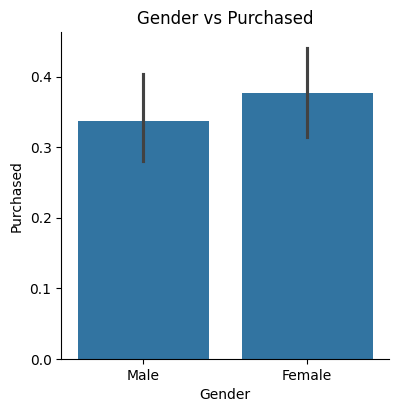

In [45]:
# Drop the 'User ID' column as it is not useful for prediction
df.drop(['User ID'], axis=1, inplace=True)

# Visualize the relationship between Gender and Purchased
sns.catplot(x="Gender", y="Purchased", data=df, kind="bar", height=4)
plt.title("Gender vs Purchased")
plt.show()

In [48]:
# Check for missing values
df.isnull().sum()

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Now try dropping the columns again
df = df.drop(columns=['Gender'])

# Split data into features and target variable
X = df.drop('Purchased', axis=1)  # Features
y = df['Purchased']  # Target variable


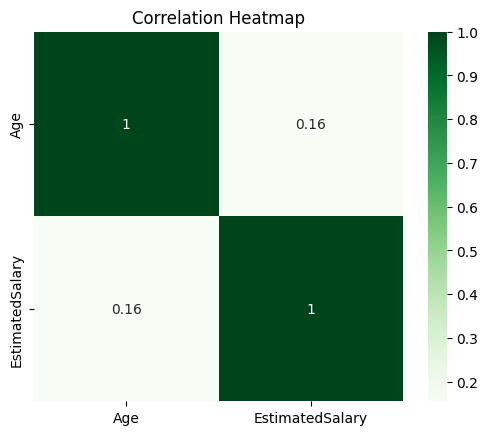

In [55]:
# Perform correlation analysis (excluding the categorical column 'Purchased')
corr = df[['Age', 'EstimatedSalary']].corr()
sns.heatmap(corr, annot=True, cmap='Greens', cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [49]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Feature Scaling to standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on training data
model.fit(X_train, y_train)


LogisticRegression()

In [52]:
y_pred = model.predict(X_test)


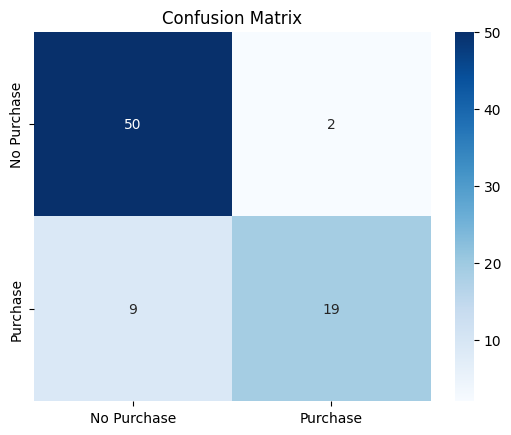

Confusion Matrix:
 [[50  2]
 [ 9 19]]


In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title("Confusion Matrix")
plt.show()
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


In [54]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Error Rate
error_rate = 1 - accuracy

# True Positive, False Positive, True Negative, False Negative
TP, FP, TN, FN = cm.ravel()

print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


Accuracy: 0.8625
Error Rate: 0.13749999999999996
Precision: 0.9047619047619048
Recall: 0.6785714285714286
True Positives (TP): 50
False Positives (FP): 2
True Negatives (TN): 9
False Negatives (FN): 19
